Objective: 
Write a program to implement a multi-layer perceptron (MLP) network with one hidden layer using numpy in Python. Demonstrate that it can learn the XOR Boolean function.

Description of Model:
A Multi-Layer Perceptron (MLP) is a type of artificial neural network (ANN) designed to model complex patterns and relationships in data. Unlike a simple perceptron, which can only solve linearly separable problems, an MLP can learn non-linear functions using multiple layers of neurons.

Architecture of MLP:-

Input Layer:
Takes in raw features (e.g., two input values for XOR).

Hidden Layer(s):
Contains one or more layers of neurons that apply weighted sums and activation functions to learn complex relationships.
In this model, we have one hidden layer with two neurons.

Output Layer:
Produces the final prediction (binary classification in this case).
This model has a single output neuron.

Input: [0 0] -> Predicted: 1, Actual: 0
Input: [0 1] -> Predicted: 1, Actual: 1
Input: [1 0] -> Predicted: 0, Actual: 1
Input: [1 1] -> Predicted: 0, Actual: 0
Accuracy: 50.00%


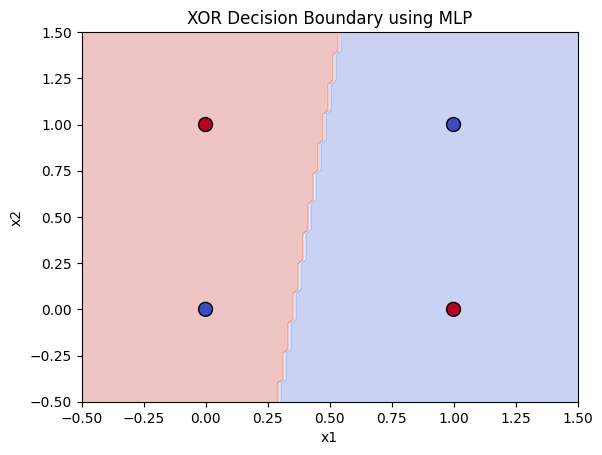

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return np.where(x >= 0, 1, 0)

def perceptron(X, W, B):
    return step_function(np.dot(X, W) + B)

def train_perceptron(X, Y, epochs=100, lr=0.1):
    weights = np.random.rand(X.shape[1])
    bias = np.random.rand()

    for _ in range(epochs):
        for i in range(len(X)):
            output = perceptron(X[i], weights, bias)
            error = Y[i] - output
            weights += lr * error * X[i]
            bias += lr * error
    
    return weights, bias

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_xor = np.array([0, 1, 1, 0])

# Train two hidden layer perceptrons
Y_hidden1 = np.array([0, 1, 1, 0])
Y_hidden2 = np.array([0, 1, 1, 0])

W1, B1 = train_perceptron(X, Y_hidden1)
W2, B2 = train_perceptron(X, Y_hidden2)

# Compute hidden layer outputs
H1 = perceptron(X, W1, B1)
H2 = perceptron(X, W2, B2)

# Create hidden layer
H = np.stack((H1, H2), axis=1)

# Train final XOR perceptron
W_xor, B_xor = train_perceptron(H, Y_xor)

# Get predictions
Y_pred = perceptron(H, W_xor, B_xor)
accuracy = np.mean(Y_pred == Y_xor) * 100

# Print results
for i in range(len(X)):
    print(f'Input: {X[i]} -> Predicted: {Y_pred[i]}, Actual: {Y_xor[i]}')

print(f'Accuracy: {accuracy:.2f}%')

# Decision boundary visualization
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = perceptron(np.stack((perceptron(grid, W1, B1), perceptron(grid, W2, B2)), axis=1), W_xor, B_xor).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=Y_xor, edgecolors='k', cmap='coolwarm', s=100)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("XOR Decision Boundary using MLP")
plt.show()


Description of code:
This Python script implements a Multi-Layer Perceptron (MLP) to solve the XOR problem using NumPy. A single-layer perceptron cannot solve XOR since it is not linearly separable, so this approach uses two perceptrons in a hidden layer to transform inputs before passing them to a final perceptron. It  defines a step activation function, a perceptron function, and a training function that updates weights and biases using the Perceptron Learning Rule. The XOR dataset is processed by training two hidden perceptrons, whose outputs form a new dataset for the final XOR perceptron. After training, predictions are made, accuracy is computed, and the decision boundary is visualized using Matplotlib.

Comments:
A single-layer perceptron fails to solve XOR because XOR is not linearly separable
MLP overcomes this by introducing a hidden layer, allowing it to learn non-linear decision boundaries.